In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [9]:
'''
dimensions: assume
weights: (m + 1) * 1 where m is the number of features. + 1 because we need the intercept
features: n * m where m is number of features, n is the number of data points
return: n * 1, each value is the prediction 
'''
def sigmoid(weights, features):
    z = np.matmul(features, weights[1:]) + weights[0]
    return 1 / (1 + np.exp(-z))

In [10]:
'''
dimensions: assume
weights: (m + 1) * 1 where m is the number of features. + 1 because we need the intercept
features: n * m where m is number of features, n is the number of data points
actual_ys: n * 1, n is the number of data points
return: one value
'''
def log_likelihood(weights, features, actual_ys):
    z = np.matmul(features, weights[1:]) + weights[0]
    return np.sum(-np.log(1 + np.exp(z))) + np.matmul(actual_ys.T, z)[0, 0]

In [11]:
'''
dimensions: assume
weights: (m + 1) * 1 where m is the number of features. + 1 because we need the intercept
features: n * m where m is number of features, n is the number of data points
actual_ys: n * 1, n is the number of data points
'''
def learn_weights(actual_ys, features, num_iterations, learning_rate):
    n_feats = features.shape[1]
    # initialize weights
    weights = np.zeros((n_feats + 1, 1))
    
    loglikelihood_outputs = []
    
    for i in range(num_iterations):
        dldb = []
        # calculate gradients for all weights
        dldb0 = np.sum(actual_ys - sigmoid(weights, features))
        dldb.append(dldb0)
        for j in range(1, len(weights)):
            dldbj = np.sum((actual_ys - sigmoid(weights, features)) * features[:, j - 1].reshape((features.shape[0], 1)))
            dldb.append(dldbj)
        
        # update weights
        weights = weights + learning_rate * np.array(dldb).reshape((len(dldb), 1))
        
        if i%1000==0:
            loglikelihood_outputs.append(log_likelihood(weights,features,actual_ys))
    
    print(1000 * (np.array(range(len(loglikelihood_outputs))) + 1))
    print(loglikelihood_outputs)
    plt.plot(1000 * (np.array(range(len(loglikelihood_outputs))) + 1), loglikelihood_outputs)
    plt.show()
    return weights

# Use the following hyperparameters:
# num_iterations = 10000
# learning_rate = 0.00005
# initial weights should be set to 0

[ 1000  2000  3000  4000  5000  6000  7000  8000  9000 10000]
[-4346.264779679941, -240.69185693049076, -194.51807678965997, -176.73134619223856, -167.1456940883363, -161.13864040520275, -157.03212592270575, -154.0607056959998, -151.82264647322882, -150.08589936235512]


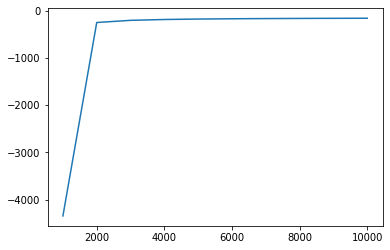

In [12]:
data = pd.read_csv('hw3_data.csv')
weights = learn_weights(data['y'].to_numpy().reshape((len(data['y']), 1)), data[['x1', 'x2']].to_numpy(), 10000, 0.00005)

# Bonus!!

In [13]:
class MyLogisticRegressionClassifier:
    def __init__(self, weights): 
        self.weights = weights
    
    '''
    features: n * 2
    T: threshold
    '''
    def predict(self, features, T=0.5):
        print(weights.shape)
        print(type(features))
        print(features.shape)
        possibility_y_is_1 = sigmoid(weights, features)
        return (possibility_y_is_1 > T).astype(int)

## Test my classifier

In [14]:
clf = MyLogisticRegressionClassifier(weights)
predicted = clf.predict(data[['x1', 'x2']].to_numpy(), 0.5)

from sklearn.metrics import classification_report
y_true = data['y']
y_pred = predicted
target_names = ['class 0', 'class 1']
print("The accuracy in training set is:")

print(classification_report(y_true, y_pred, target_names=target_names))

(3, 1)
<class 'numpy.ndarray'>
(10000, 2)
The accuracy in training set is:
              precision    recall  f1-score   support

     class 0       1.00      0.99      0.99      5000
     class 1       0.99      1.00      0.99      5000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

